In [3]:
Unif = r"Uniform policy ($\pi_{\mathrm{unif}}$)"
LF = "LF"
LFpolavg = "LF-policy-avg"
LFoccavg = "LF-occ-avg"
EF = r"$\mathbf{EpiRC\operatorname{-}PGS\;(Ours)}$"
OptimalCMDP = "Optimal policy"

linestyle = {Unif: '--', LF: ':', LFpolavg: '-', LFoccavg: '-', OptimalCMDP: '--', EF: '-'} 
linewidth = {Unif: 2, LF: 1, LFpolavg: 2, LFoccavg: 2, EF: 2} 
marker = {Unif: 'P', LF: 'X', LFpolavg: '*', LFoccavg: 'D', EF: 'o'}
markersize = {Unif: 150, LF: 150, LFpolavg: 150, LFoccavg: 60, EF: 100}
alphas = {Unif: 1.0, LF: 0.6, LFpolavg: 1.0, LFoccavg: 1.0, EF: 1.0} 
colors = {Unif: "C0", LF: "C1", LFpolavg: "C2", LFoccavg: "C3", EF: "C4", OptimalCMDP: "C5"} 

performance_label = r"Objective Return"
violation_label = r"Constraint Violation"
iteration_label = r"Outer Iteration $k$"

xlim_iteration = (-0.2, 1300)
xscale_iteration = "symlog"

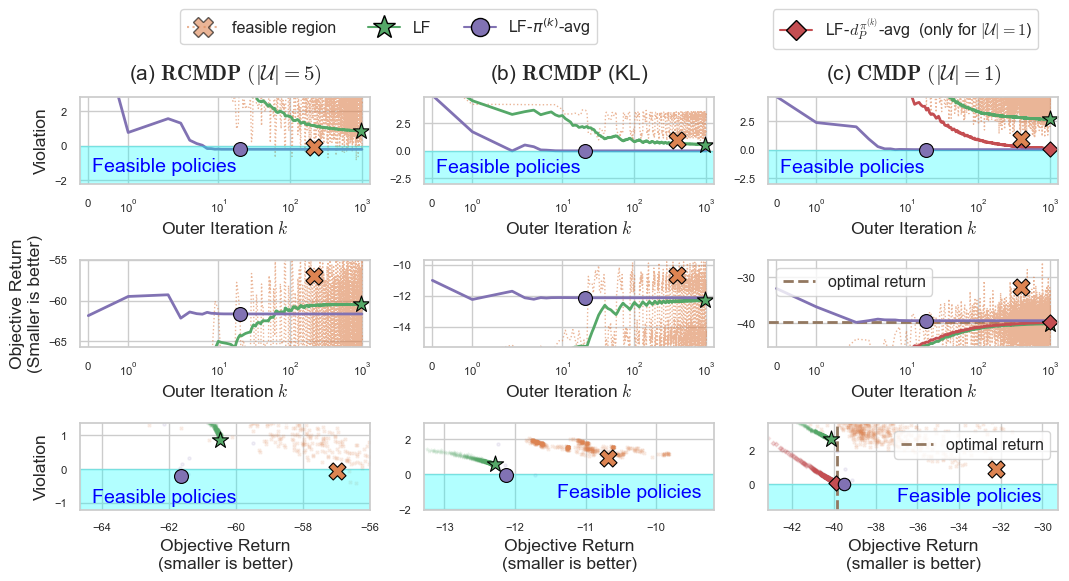

In [105]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = 'cm'

fig = plt.figure(figsize=(11, 5.5))
sns.set_theme(font_scale=1.05)
axes = []
ticksize = 8


# ===== Plot 1 ===== 

FIGNAME = "KL/garnet-env-5-3-0.1-1.0-0.99"
best_idx = {}  # to report the best index of each algorithms
Jmin, Jmax, vmin, vmax = np.inf, -np.inf, np.inf, -np.inf

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)

# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(338)

    for name in [LF, LFpolavg, EF]:

        # >>>>> plot J vs v
        J_list, v_list = algos[name]
        Js, Vs = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(Js, Vs, marker=marker[name], s=5, color=colors[name], alpha=0.1)
        # <<<<<

        # >>>>> if a feasible policy exist, emphasize the best policy
        if np.sum(Vs <= 0) > 0:  
            vio_J = np.where(Vs <= 0, Js, np.infty)
            best_idx[name] = np.argmin(vio_J)
        else:
            best_idx[name] = np.argmin(Vs)
        J, v = Js[best_idx[name]], Vs[best_idx[name]]
        plt.scatter(J, v, marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)
        # <<<<<

        # >>>>> update plot box
        Jmin, Jmax = min(J, Jmin), max(J, Jmax)
        vmin, vmax = min(v, vmin), max(v, vmax)

    Jmin, Jmax = Jmin - 1, Jmax + 1
    vmin, vmax = vmin - 2, vmax + 3

    ax.fill_between(x=[Jmin-3, Jmax+3], y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.ylim(vmin, vmax-1)
    plt.xlim(Jmin, Jmax+0.5)
    plt.xlabel("Objective Return" "\n" "(smaller is better)")
    plt.text(-11.4, -1.3, "Feasible policies", fontsize=14, color="blue")

    ax.tick_params(axis='both', which='major', labelsize=ticksize)

# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(332)
    for name in [LF, LFpolavg, EF]:
        J_list, v_list = algos[name]
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(v)), v, label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    ax.fill_between(x=xlim_iteration, y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.ylim(vmin-1, vmax+1)
    plt.xscale(xscale_iteration)
    plt.xlim(*xlim_iteration)
    plt.xlabel(iteration_label)
    plt.text(0.1, -2.0, "Feasible policies", fontsize=14, color="blue")

    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    title = ax.set_title(r"(b) $\mathbf{RCMDP}$ (KL)", x=0.5, y=1.1, fontsize=15)


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(335)

    for name in [LF, LFpolavg, EF]:
        J_list, v_list = algos[name]
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], J[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.ylim(Jmin-2, Jmax)
    plt.xscale(xscale_iteration)
    plt.xlim(*xlim_iteration)
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# ===== Plot 2 ===== 

FIGNAME = "finite/garnet-env-7-4-0.1-5-0.995"
best_idx = {}  # to report the best index of each algorithms
Jmin, Jmax, vmin, vmax = np.inf, -np.inf, np.inf, -np.inf

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)

# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(337)

    for name in [LF, LFpolavg, EF]:

        # >>>>> plot J vs v
        J_list, v_list = algos[name]
        Js, Vs = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(Js, Vs, marker=marker[name], s=5, color=colors[name], alpha=0.1)
        # <<<<<

        # >>>>> if a feasible policy exist, emphasize the best policy
        if np.sum(Vs <= 0) > 0:  
            vio_J = np.where(Vs <= 0, Js, np.infty)
            best_idx[name] = np.argmin(vio_J)
        else:
            best_idx[name] = np.argmin(Vs)
        J, v = Js[best_idx[name]], Vs[best_idx[name]]
        plt.scatter(J, v, marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)
        # <<<<<

        # >>>>> update plot box
        Jmin, Jmax = min(J, Jmin), max(J, Jmax)
        vmin, vmax = min(v, vmin), max(v, vmax)

    Jmin, Jmax = Jmin - 3, Jmax + 1
    vmin, vmax = vmin - 1, vmax + 1

    ax.fill_between(x=[Jmin, Jmax], y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.ylim(vmin, vmax-0.5)
    plt.xlim(Jmin, Jmax)
    plt.xlabel("Objective Return" "\n" "(smaller is better)")
    plt.ylabel("Violation")

    plt.text(-64.3, -1.0, "Feasible policies", fontsize=14, color="blue")
    ax.tick_params(axis='both', which='major', labelsize=ticksize)

# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(331)
    for name in [LF, LFpolavg, EF]:
        J_list, v_list = algos[name]
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(v)), v,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    ax.fill_between(x=xlim_iteration, y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.ylim(vmin-1, vmax+1)
    plt.xscale(xscale_iteration)
    plt.xlim(xlim_iteration)
    plt.xlabel(iteration_label)
    plt.ylabel("Violation")
    plt.text(0.1, -1.5, "Feasible policies", fontsize=14, color="blue")
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    title = ax.set_title(r"(a) $\mathbf{RCMDP}$ $(|\mathcal{U}|=5)$", x=0.5, y=1.1, fontsize=15)


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(334)

    for name in [LF, LFpolavg, EF]:
        J_list, v_list = algos[name]
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], J[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.xscale(xscale_iteration)
    plt.xlim(xlim_iteration)
    plt.ylim(Jmin-1, Jmax+1)
    plt.xlabel(iteration_label)
    plt.ylabel("Objective Return" "\n" "(Smaller is better)")
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# ===== Plot 3 ===== 

FIGNAME = "finite/garnet-env-7-4-0.1-1-0.99"
best_idx = {}  # to report the best index of each algorithms
Jmin, Jmax, vmin, vmax = np.inf, -np.inf, np.inf, -np.inf

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)

# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(339)
    ax.axvline(x=algos[OptimalCMDP][0].mean(axis=0)[0], color=colors[OptimalCMDP], linewidth=2, label="optimal return", linestyle=linestyle[OptimalCMDP])
    for name in [LF, LFpolavg, LFoccavg, EF]:

        # >>>>> plot J vs v
        J_list, v_list = algos[name]
        Js, Vs = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(Js, Vs, marker=marker[name], s=5, color=colors[name], alpha=0.1)
        # <<<<<

        # >>>>> if a feasible policy exist, emphasize the best policy
        if np.sum(Vs <= 0) > 0:  
            vio_J = np.where(Vs <= 0, Js, np.infty)
            best_idx[name] = np.argmin(vio_J)
        else:
            best_idx[name] = np.argmin(Vs)
        J, v = Js[best_idx[name]], Vs[best_idx[name]]
        
        if name == EF:
            size = 80
        else:
            size = markersize[name]
        plt.scatter(Js[best_idx[name]], Vs[best_idx[name]], marker=marker[name], color=colors[name], s=size, edgecolors="black", linewidths=0.8, zorder=2)
        # <<<<<

        # >>>>> update plot box
        Jmin, Jmax = min(J, Jmin), max(J, Jmax)
        vmin, vmax = min(v, vmin), max(v, vmax)

    Jmin, Jmax = Jmin - 1, Jmax + 1
    vmin, vmax = vmin - 1, vmax + 2

    ax.fill_between(x=[Jmin-5, Jmax+5], y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.xlim(Jmin-2, Jmax+2)
    plt.ylim(vmin-0.5, vmax-1)
    plt.xlabel("Objective Return" "\n" "(smaller is better)")
    plt.legend(loc="upper right")
    plt.text(-37, -1.0, "Feasible policies", fontsize=14, color="blue")

    ax.tick_params(axis='both', which='major', labelsize=ticksize)

# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(333)
    for name in [LF, LFpolavg, LFoccavg, EF]:
        J_list, v_list = algos[name]

        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(v)), v, label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    ax.fill_between(x=xlim_iteration, y1=-100, y2=0, color="cyan", alpha=0.3)
    plt.xscale(xscale_iteration)
    plt.xlim(*xlim_iteration)
    plt.ylim(vmin-2, vmax)
    plt.xlabel(iteration_label)
    plt.text(0.1, -2.0, "Feasible policies", fontsize=14, color="blue")
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    title = ax.set_title(r"(c) $\mathbf{CMDP}$ $(|\mathcal{U}|=1)$", x=0.5, y=1.1, fontsize=15)


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(336)
    ax.axhline(y=algos[OptimalCMDP][0].mean(axis=0)[0], color=colors[OptimalCMDP], linewidth=2, zorder=1, label="optimal return", linestyle=linestyle[OptimalCMDP])

    for name in [LF, LFpolavg, LFoccavg, EF]:
        J_list, v_list = algos[name]
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1, linewidth=linewidth[name])
        plt.scatter(best_idx[name], J[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)
    plt.xscale(xscale_iteration)
    plt.xlim(*xlim_iteration)
    plt.ylim(Jmin-4, Jmax+5)
    plt.xlabel(iteration_label)
    plt.legend(loc="upper left")
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# ===== Legend =====
with sns.axes_style("whitegrid"):
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    handles = []
    # handles.append(
    #     plt.fill_between(x=[], y1=0, y2=0, color="cyan", alpha=0.5, label="feasible region")
    # )

    labels = [LF, LFpolavg, EF]
    for name in labels:
        size = 13
        if name == LF:
            size = 15
        elif name == LFpolavg:
            size = 17
        handles.append(
            plt.plot([], label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], marker=marker[name], markersize=size, markeredgecolor="black")[0]
        )
    labels = ["feasible region"] + [LF, r"LF-$\pi^{(k)}$-avg", EF]
    lgd = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.37, 1.07), ncol=len(labels))


with sns.axes_style("whitegrid"):
    plt.rcParams["mathtext.fontset"] = 'cm'
    label = r"LF-$d^{\pi^{(k)}}_P$-avg  (only for $|\mathcal{U}|=1$)"
    handles = []
    handles.append(
        plt.plot([], linestyle=linestyle[LFoccavg], color=colors[LFoccavg], marker=marker[LFoccavg], markersize=10, markeredgecolor="black")[0]
    )
    lgd = fig.legend(handles, [label], loc="upper center", bbox_to_anchor=(0.84, 1.07), ncol=len(labels))


fig.tight_layout()

plt.savefig(f"results/all.pdf", bbox_extra_artists=(lgd, ), bbox_inches="tight")
plt.savefig(f"results/all.png", bbox_extra_artists=(lgd, ), bbox_inches="tight")

